## import modules

In [20]:
!pip install tensorflow==2.11.1
!pip install matplotlib==3.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 MB 3.2 MB/s eta 0:00:0000:0100:02
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.1 MB/s eta 0:00:0000:0100:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.6-cp39-cp39-macosx_10_9_x86_64.whl (980 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 6.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 4.8 MB/s eta 0:00:0000:0100:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-macosx_10_9_x86_64.whl (3.5 MB)
  Attempting uninstall: tensorboard-data-server
    Found existing installati

  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.9
    Uninstalling protobuf-4.21.9:
      Successfully uninstalled protobuf-4.21.9
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tensorboard-2.12.0:
      Successfully uninstalled tensorboard-2.12.0


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2023-03-24 23:11:48.683362: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## define model architecture

In [2]:
class ConvNet(tf.keras.Model):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(28, 28, 1))
        self.cn2 = tf.keras.layers.Conv2D(32, 3, activation='relu')
        self.dp1 = tf.keras.layers.Dropout(0.10)
        self.dp2 = tf.keras.layers.Dropout(0.25)
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.cn1(x)
        x = self.cn2(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = self.dp1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dp2(x)
        x = self.fc2(x)
        return x

## create data loaders

In [3]:
# Load the MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add a channels dimension (required for CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Create a dataloader for training.
train_dataloader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataloader = train_dataloader.shuffle(10000)
train_dataloader = train_dataloader.batch(32)

# Create a dataloader for testing.
test_dataloader = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataloader = test_dataloader.batch(500)

2023-03-24 23:11:52.845124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## define optimizer and run training epochs

In [4]:
tf.random.set_seed(0)
model = ConvNet()
optimizer = tf.keras.optimizers.experimental.Adadelta(learning_rate=0.5)
model.compile(optimizer=optimizer,
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

## model training

In [5]:
# Train the model using the tf.data.Dataset API
model.fit(train_dataloader, epochs=3, validation_data=test_dataloader)

Epoch 1/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2213 - accuracy: 0.9328 - val_loss: 0.0611 - val_accuracy: 0.9798
Epoch 2/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0857 - accuracy: 0.9751 - val_loss: 0.0423 - val_accuracy: 0.9857
Epoch 3/3
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0412 - val_accuracy: 0.9862


## run inference on trained model

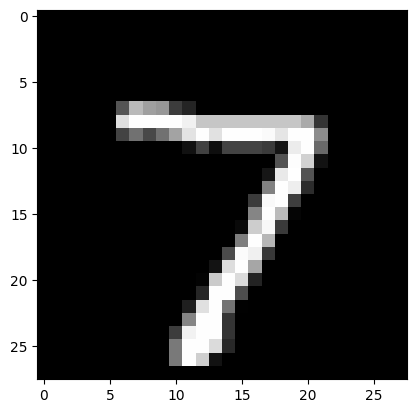

In [6]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
plt.imshow(sample_data[0], cmap='gray', interpolation='none')
plt.show()

In [7]:
print(f"Model prediction is : {tf.math.argmax(model(sample_data)[0])}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 7
Ground truth is : 7
